In [19]:
%matplotlib inline

# Basics of PyTorch

We start by running some basic PyTorch commands to get acquainted with the library. This section is based on the [PyTorch example](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) in the official tutorials.

Numpy is a generic Python library for scientific computing and allows to work with $n$-dimensional arrays.

In [20]:
# load numpy
import numpy as np

# create standard normally distributed vectors x and y
x = np.random.randn(20)
y = np.random.randn(20)

# compute the standard inner product of x and y
np.dot(x, y)

np.float64(-4.136547268158019)

In principle, one can implement even neural network models using numpy. However, numpy has two severe limitations. When working with deep neural networks, often one wants to speed up the computations by running them on GPUs. Unfortunately, numpy does not support GPUs. Moreover, training of differentiable models such as neural networks requires to keep track of gradients. This functionality is not provided by numpy.

The PyTorch library tries to solve both issues.

In [21]:
# load PyTorch
import torch

You can check that you use a recent version of PyTorch (as of September 2021, the most recent version is 1.9.0):

In [22]:
torch.__version__

'2.4.1+cpu'

Similar to numpy, PyTorch allows us to work with $n$-dimensional arrays, which are called *tensors*.

In [23]:
# create standard normally distributed vectors x and y
x = torch.randn(20)
y = torch.randn(20)

# compute the standard inner product of x and y
torch.dot(x, y)

tensor(-2.9699)

We can easily convert numpy arrays to PyTorch tensors:

In [24]:
a = np.random.randn(20)
torch.from_numpy(a)

tensor([-0.3879, -0.0871,  1.1264,  0.2471,  0.1212,  0.2990, -0.1571, -0.7405,
        -1.2477,  0.2495,  0.5811,  2.7638,  0.3993,  0.6685, -0.2758,  0.5005,
         0.8631, -1.0516, -1.3921,  1.1539], dtype=torch.float64)

By default numpy uses 64 bit floating point numbers, which are preserved by the conversion to PyTorch tensors. However, floating point numbers in PyTorch are encoded with 32 bits by default. The standard floating point representation in PyTorch can be obtained by running

In [25]:
torch.from_numpy(a).float()

tensor([-0.3879, -0.0871,  1.1264,  0.2471,  0.1212,  0.2990, -0.1571, -0.7405,
        -1.2477,  0.2495,  0.5811,  2.7638,  0.3993,  0.6685, -0.2758,  0.5005,
         0.8631, -1.0516, -1.3921,  1.1539])

Similarly, PyTorch tensors can be converted to numpy arrays. Note that in this case an array with 32 bit floating point numbers is returned:

In [26]:
b = torch.randn(20)
b.numpy()

array([-1.3296857 , -0.5963727 ,  0.50560147, -0.56112355, -1.0972964 ,
       -0.47748345, -1.3065517 , -0.38121483,  0.45694244, -0.09440397,
        1.3870075 ,  0.4609989 , -0.66081935,  1.1818414 ,  1.0169444 ,
       -0.6054543 , -0.5574822 , -0.44624105,  1.534862  , -0.29408467],
      dtype=float32)

An advantage of PyTorch over numpy is that we can utilize GPUs by moving our data and models to the GPU. Note that the following example is only executed if you have access to a GPU.

In [27]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(torch.dot(x, y))

In the same way, data and models can be moved back to the CPU.

In [28]:
x = x.cpu()
y = y.cpu()

If we do not want to check `torch.cuda.is_available()` repeatedly, we can also define a device on which we would like to perform our computations and move tensors to this device.

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

x = x.to(device)
y = y.to(device)

As mentioned above, often differentiable models are trained by gradient descent. To perform gradient descent, we have to know the gradient of the objective function with respect to the model parameters. In neural networks, these gradients can be computed efficiently by using the [backpropagation algorithm](https://en.wikipedia.org/wiki/Backpropagation).

During the forward pass in our model, PyTorch defines a *computational graph*, whose nodes are PyTorch tensors and whose edges are the functions mapping one input tensor to another output tensor. By backpropagating this graph, we obtain the desired gradients. 

More concretely, if `x` is a tensor with attribute `x.requires_grad = True` then `x.grad` will be another tensor holding the gradient of `x` with respect to some scalar value.

In [30]:
# state that we want to obtain the gradients of x
x.requires_grad = True

# run the forward pass and build the computational graph
z = torch.sum(x - y)
print(f"Output of the forward pass: {z}")

# backpropagate the graph
z.backward()

print(f"Gradient information of x: {x.grad}")
print(f"Gradient information of y: {y.grad}")

Output of the forward pass: -4.700253486633301
Gradient information of x: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
Gradient information of y: None


By default, if we repeat our computations and backpropagate again, the gradients are accumulated.

In [31]:
# run the forward pass and build the computational graph
z = torch.sum(x - y)
print(f"Output of the forward pass: {z}")

# backpropagate the graph
z.backward()

print(f"Gradient information of x: {x.grad}")
print(f"Gradient information of y: {y.grad}")

Output of the forward pass: -4.700253486633301
Gradient information of x: tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.])
Gradient information of y: None


To override the gradients, we have to set them to zero before running the forward pass.

In [32]:
# set the gradient of x to zero
x.grad.zero_()

# run the forward pass and build the computational graph
z = torch.sum(x - y)
print(f"Output of the forward pass: {z}")

# backpropagate the graph
z.backward()

print(f"Gradient information of x: {x.grad}")
print(f"Gradient information of y: {y.grad}")

Output of the forward pass: -4.700253486633301
Gradient information of x: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
Gradient information of y: None


If we want perform operations that should not be tracked by PyTorch, we can wrap them inside a `torch.no_grad()` clause.

In [33]:
with torch.no_grad():
    print(torch.sum(x - y))

tensor(-4.7003)


With recent PyTorch versions an error is thrown if we try to convert a PyTorch tensor with gradient information to a numpy array:

In [34]:
# x.numpy()

As suggested by the error message, we first have to remove the gradient information with [`detach`](https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html) (we "detach" the tensor from the computational graph):

In [35]:
x.detach().numpy()

array([ 0.72164696, -1.584696  , -0.68977183,  0.9356531 , -2.0583754 ,
        0.80881506,  1.5221827 ,  0.745989  ,  3.5954957 ,  0.18648027,
        0.66402286,  0.2782941 , -1.1047453 ,  0.5727057 ,  0.63391155,
       -1.6376853 ,  0.07653937, -0.00514863, -0.28158408, -0.7522372 ],
      dtype=float32)

# Linear regression example

Now we do something (slightly) more interesting. We consider linear regression using PyTorch. We study the model
\begin{equation*}
    y = \theta_0 + \theta_1 x + \epsilon,
\end{equation*}
where $\epsilon$ represents the noise term.

We generate training data $\{x_i, y_i\}_{i=1}^N$ with $N = 100$ data points from the model with the true parameters $\boldsymbol{\theta} = \begin{bmatrix} \theta_0 & \theta_1\end{bmatrix}^\intercal = \begin{bmatrix} 0.3 & 0.1 \end{bmatrix}^\intercal$ and normally distributed noise $\epsilon \sim \mathcal{N}(0, 0.01^2)$. The inputs $x_i$ are sampled uniformly from the interval $[0,1]$.

In [36]:
theta_true = [0.3, 0.1]
N = 100

np.random.seed(1234)
xt = np.random.uniform(size=N)
yt = theta_true[0] + theta_true[1] * xt + 0.01 * np.random.randn(N)

We plot the data to see what it looks like.

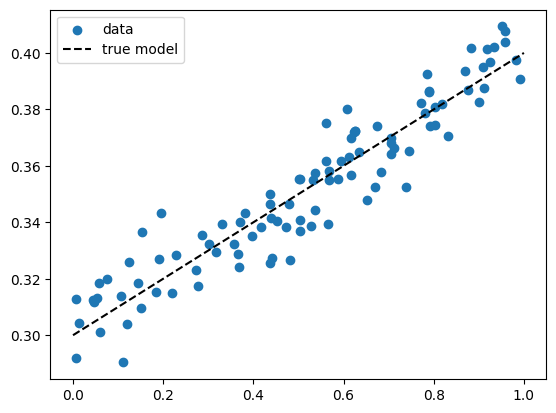

In [37]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(xt, yt, label='data')
plt.plot([0, 1], [theta_true[0], theta_true[0] + theta_true[1]], 'k--', label='true model')
plt.legend()
plt.show()

We want to estimate the parameters $\boldsymbol{\theta} = \begin{bmatrix} \theta_0 & \theta_1\end{bmatrix}^\intercal$ of the linear regression model based on the training data $\{x_i,y_i\}_{i=1}^N$. The training data statistics can be written as
\begin{equation*}
  \mathbf{y} = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\epsilon}, \qquad \mathbf{y}= \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix}, \qquad \mathbf{X} = \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_N \end{bmatrix}, \qquad \boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix},
\end{equation*}
where $\boldsymbol{\epsilon}$ is a vector with the noise realizations. This formulation also adheres to the common convention in PyTorch that expects data to be multi-dimensional with each row representing a data sample. Hence we even reshape the vector of outputs to a matrix with one column by using `view(-1, 1)`.

In [38]:
# build the data matrices
X = torch.stack([torch.ones(N), torch.from_numpy(xt).float()], dim = 1)
Y = torch.from_numpy(yt).float().view(-1, 1)

We also need to create a tensor for $\boldsymbol{\theta}$, which will be updated iteratively during the learning process. We initialize it with the constant  matrix $\boldsymbol{\theta} = \begin{bmatrix} 1 & 1 \end{bmatrix}^\intercal$ and specify that we want to obtain the gradient of the (not yet defined) loss with respect to $\boldsymbol{\theta}$ during backpropagation.

In [39]:
# define the initial model parameters
theta = torch.ones(2, 1, requires_grad = True)

We proceed by implementing the mean squared error cost function $J(\boldsymbol{\theta})$, where
\begin{equation*}
J(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^N {(\theta_0 + \theta_1 x_i − y_i)}^2 = \frac{1}{n} {\|\mathbf{X} \boldsymbol{\theta} − \mathbf{y} \|}^2_2.
\end{equation*}
We multiply the input $\mathbf{X}$ with the variable $\boldsymbol{\theta}$ using `mm` for matrix multiplication. We then subtract the corresponding outputs, take the square, and finally average over all data samples.

In [40]:
# evaluate the mean squared error for the current parameters
loss = (X.mm(theta) - Y).pow(2).mean()

We perform the optimization iteratively with gradient descent. This means that in every optimization step we update the parameter $\boldsymbol{\theta}$ by going in the opposite direction of the gradient of the cost function with a certain step length $\gamma$, i.e., we compute $\boldsymbol{\theta} := \boldsymbol{\theta} - \gamma \nabla J(\boldsymbol{\theta})$. In this example we choose $\gamma = 0.1$. In PyTorch the update step can be implemented as

In [41]:
# perform backpropagation
loss.backward()

# perform a gradient descent step
with torch.no_grad():
    theta -= 0.1 * theta.grad

Before we continue with the next optimization step, we have to reset the gradient to zero.


In [42]:
# reset the gradient information
theta.grad.zero_()

tensor([[0.],
        [0.]])

The training step described above can now be repeated multiple times in a `for` loop. As an additional feature we create an illustration of the loss during the course of the optimization procedure. 

Epoch    1: training loss  1.422702
Epoch  100: training loss  0.001226
Epoch  200: training loss  0.000196
Epoch  300: training loss  0.000102
Epoch  400: training loss  0.000094
Epoch  500: training loss  0.000093
Epoch  600: training loss  0.000093
Epoch  700: training loss  0.000093
Epoch  800: training loss  0.000093
Epoch  900: training loss  0.000093
Epoch 1000: training loss  0.000093


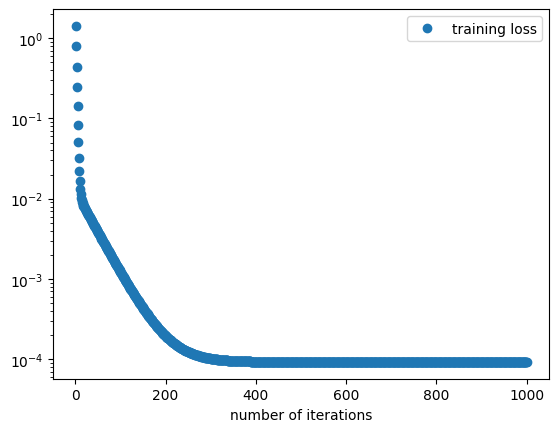

In [43]:
# define the initial model parameters
theta = torch.ones(2, 1, requires_grad = True)

# track the training loss
training_loss = []

# in multiple iterations
for i in range(1000):
    # evaluate the mean squared error for the current parameters
    loss = (X.mm(theta) - Y).pow(2).mean()
    
    # update the statistic and print loss
    training_loss.append(loss.item())
    if i == 0 or (i + 1) % 100 == 0:
      print(f"Epoch {i + 1:4d}: training loss {training_loss[-1]: 9.6f}")
    
    # perform backpropagation
    loss.backward()

    # perform a gradient descent step
    with torch.no_grad():
        theta -= 0.1 * theta.grad
        
        # reset the gradient information
        theta.grad.zero_()

plt.figure()
plt.plot(np.arange(1, len(training_loss) + 1), training_loss, 'o', label='training loss')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

We can check visually that the estimated model is actually close to the true model.

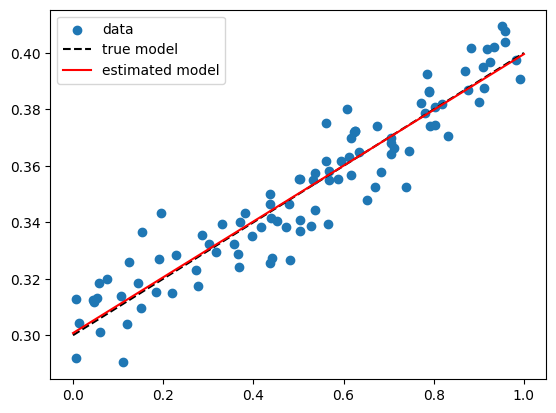

In [44]:
# we have to detach from the graph since otherwise the automatic conversion
# to a numpy array performed by matplotlib will error
theta_numpy = theta.detach().numpy()

plt.scatter(xt, yt, label = 'data')
plt.plot([0, 1], [theta_true[0], theta_true[0] + theta_true[1]], 'k--', label = 'true model')
plt.plot([0, 1], [theta_numpy[0], theta_numpy[0] + theta_numpy[1]], 'r-', label = 'estimated model')
plt.legend()
plt.show()

The optimization of model parameters is a very common task in machine learning. PyTorch provides a [library of different optimization algorithms](https://pytorch.org/docs/stable/optim.html) which simplify this procedure, in particular for models with many parameters. The following code snippet defines an `optimizer` that can be used to optimize the parameters `theta` by regular gradient descent with a learning rate of `0.1`.

In [45]:
import torch.optim as optim

# define the initial model parameters
theta = torch.ones(2, 1, requires_grad = True)

# define the optimizer
optimizer = optim.SGD([theta], lr=0.1)

After we have computed the gradients for the model parameters that we want to optimize, `optimizer.step()` performs one gradient descent step. The gradients of all optimized parameters can be set to zero by running `optimizer.zero_grad()`.

Taken together, the training of `theta` reduces to the following procedure.

Epoch    1: training loss  1.422702
Epoch  100: training loss  0.001226
Epoch  200: training loss  0.000196
Epoch  300: training loss  0.000102
Epoch  400: training loss  0.000094
Epoch  500: training loss  0.000093
Epoch  600: training loss  0.000093
Epoch  700: training loss  0.000093
Epoch  800: training loss  0.000093
Epoch  900: training loss  0.000093
Epoch 1000: training loss  0.000093


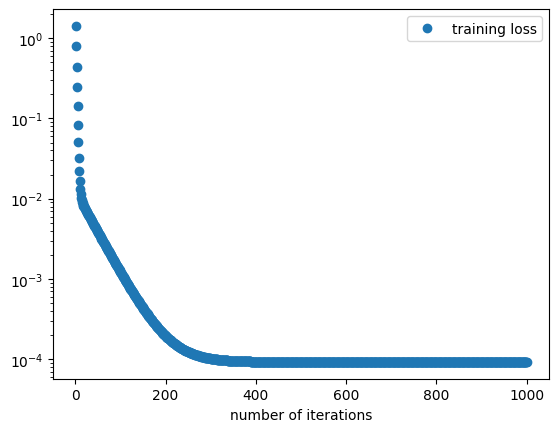

In [46]:
# define the initial model parameters
theta = torch.ones(2, 1, requires_grad = True)

# define the optimizer
optimizer = optim.SGD([theta], lr=0.1)

# track the training loss
training_loss = []

# in multiple iterations
for i in range(1000):
    # evaluate the mean squared error for the current parameters
    loss = (X.mm(theta) - Y).pow(2).mean()
    
    # update the statistic and print loss
    training_loss.append(loss.item())
    if i == 0 or (i + 1) % 100 == 0:
      print(f"Epoch {i + 1:4d}: training loss {training_loss[-1]: 9.6f}")
    
    # perform backpropagation
    loss.backward()

    # perform a gradient descent step
    optimizer.step()

    # reset the gradient information
    optimizer.zero_grad()
    
plt.figure()
plt.plot(np.arange(1, len(training_loss) + 1), training_loss, 'o', label='training loss')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

Again we inspect our estimated model visually.

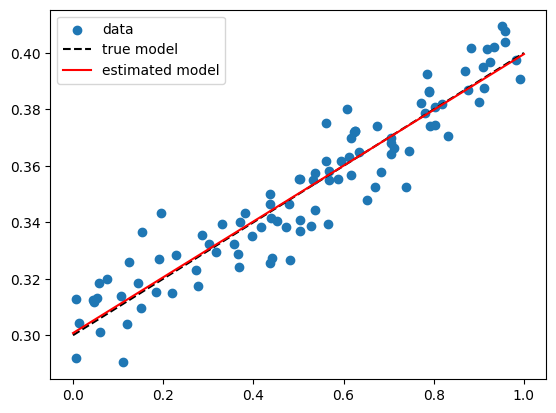

In [47]:
theta_numpy = theta.detach().numpy()

plt.scatter(xt, yt, label = 'data')
plt.plot([0, 1], [theta_true[0], theta_true[0] + theta_true[1]], 'k--', label = 'true model')
plt.plot([0, 1], [theta_numpy[0], theta_numpy[0] + theta_numpy[1]], 'r-', label = 'estimated model')
plt.legend()
plt.show()

Our regression model can be viewed as a neural network with only one linear layer. PyTorch already provides a [model of linear transformations](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) that by default also includes a bias term. The following code creates such a linear transformation for one-dimensional inputs and outputs.

In [48]:
import torch.nn as nn

# define an affine transformation
affine = nn.Linear(1, 1)

We can extract the internal parameters of the linear layer.

In [49]:
list(affine.parameters())

[Parameter containing:
 tensor([[0.4752]], requires_grad=True),
 Parameter containing:
 tensor([-0.9769], requires_grad=True)]

We see that by default gradients will be computed with respect to these parameters during backpropagation. Note that the parameters are randomly initialized and not set to 1.

We can make the correspondence to $\beta_0$ and $\beta_1$ a bit clearer.

In [50]:
theta0 = affine.bias.data
theta1 = affine.weight.data
print(f"theta0: {theta0}")
print(f"theta1: {theta1}")

theta0: tensor([-0.9769])
theta1: tensor([[0.4752]])


Conveniently, in contrast to our implementation above, PyTorch's linear layer does not require us to add a column of ones to our data matrix. Instead we can work with the given data directly, after converting it to a PyTorch tensor and reshaping it to a matrix with one column.

In [51]:
# build data matrix
X = torch.from_numpy(xt).float().view(-1, 1)

# apply the affine transformation to the data
affine(X)

tensor([[-0.8859],
        [-0.6813],
        [-0.7689],
        [-0.6037],
        [-0.6062],
        [-0.8474],
        [-0.8455],
        [-0.5958],
        [-0.5216],
        [-0.5606],
        [-0.8069],
        [-0.7388],
        [-0.6521],
        [-0.6382],
        [-0.8009],
        [-0.7102],
        [-0.7378],
        [-0.9704],
        [-0.6096],
        [-0.5575],
        [-0.8035],
        [-0.6845],
        [-0.9411],
        [-0.8016],
        [-0.5335],
        [-0.6674],
        [-0.7881],
        [-0.6021],
        [-0.8263],
        [-0.7069],
        [-0.5639],
        [-0.7696],
        [-0.5957],
        [-0.9086],
        [-0.6422],
        [-0.6421],
        [-0.8729],
        [-0.5374],
        [-0.7668],
        [-0.5448],
        [-0.9485],
        [-0.8893],
        [-0.9544],
        [-0.6562],
        [-0.6943],
        [-0.7235],
        [-0.9563],
        [-0.7101],
        [-0.8202],
        [-0.7379],
        [-0.9237],
        [-0.6883],
        [-0.

We can rewrite the training procedure using this linear layer.

Epoch    1: training loss  0.396692
Epoch  100: training loss  0.000169
Epoch  200: training loss  0.000100
Epoch  300: training loss  0.000093
Epoch  400: training loss  0.000093
Epoch  500: training loss  0.000093
Epoch  600: training loss  0.000093
Epoch  700: training loss  0.000093
Epoch  800: training loss  0.000093
Epoch  900: training loss  0.000093
Epoch 1000: training loss  0.000093


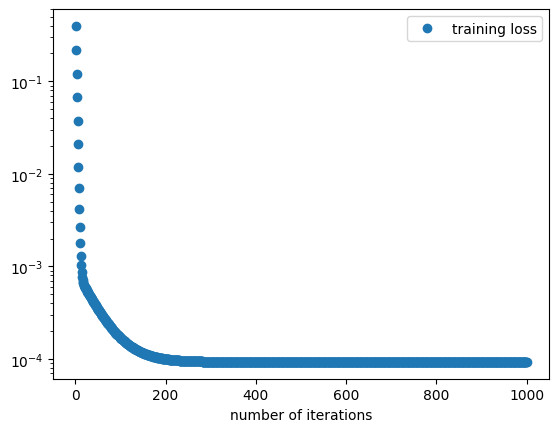

In [52]:
# define the initial model parameters
affine = nn.Linear(1, 1)

# define the optimizer
optimizer = optim.SGD(affine.parameters(), lr=0.1)

# track the training loss
training_loss = []

# in multiple iterations
for i in range(1000):
    # evaluate the mean squared error for the current parameters
    loss = (affine(X) - Y).pow(2).mean()
        
    # update the statistic and print loss
    training_loss.append(loss.item())
    if i == 0 or (i + 1) % 100 == 0:
      print(f"Epoch {i + 1:4d}: training loss {training_loss[-1]: 9.6f}")
    
    # perform backpropagation
    loss.backward()

    # perform a gradient descent step
    optimizer.step()

    # reset the gradient information
    optimizer.zero_grad()
    
plt.figure()
plt.plot(np.arange(1, len(training_loss) + 1), training_loss, 'o', label='training loss')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.legend()
plt.show()

Let us check again that we obtain a reasonably well-trained model.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

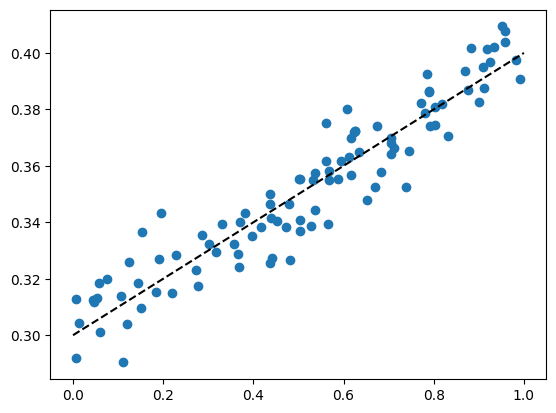

In [53]:
# extract theta0 and theta1 from the linear layer
theta0 = affine.bias.detach().numpy()
theta1 = affine.weight.detach().numpy()

plt.scatter(xt, yt, label = 'data')
plt.plot([0, 1], [theta_true[0], theta_true[0] + theta_true[1]], 'k--', label = 'true model')
plt.plot([0, 1], [theta0, theta0 + theta1], 'r-', label = 'estimated model')
plt.legend()
plt.show()

Note that we have performed linear regression by iteratively minimizing the mean squared error cost function instead of using the closed form solution given by the normal equations. This numerical approach can be used also with other models and cost functions to find the parameters, also in problems where no closed form solution is available.